> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


> In this project, we are going to analyze a dataset collected from The Movie Database (TMDb). This dataset has 10,000 movies and contains 21 columns like user rating ans revenue.

> **Questions**: 1- Find net profit for all movies. 2- What is the relationship between profit and vote_count? 3- does the movie with longer runtime, above the median of runtime, cost more than the movie with a shorter runtime? 4- In 2015, which genres movies produced more, comedy or action?

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



### Data Cleaning - Deleting unnecessary columns

In [3]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#list of columns that we don't need
deletedColm = ['id', 'imdb_id', 'popularity', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date', 'budget_adj', 'revenue_adj']

#deleting unwanted columns
df = df.drop(deletedColm, axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(1), int64(5), object(3)
memory usage: 764.1+ KB


### Data Cleaning - Deleting duplicated rows, rows with null value, rows with 0 value in budget or revenue

In [4]:
#removing all rows with 0 value in budget or revenue
df = df[(df.budget > 0) & (df.revenue > 0)]

#check dataframe if it has rows with 0 value in budget or revenue columns
df.query('budget == 0 | revenue == 0')

,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year


In [5]:
#removing all rows with null
df.dropna(inplace=True)

#check dataframe if it has nulls
df.isnull().sum()

budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [6]:
#removing duplicated rows
df.drop_duplicates(inplace=True)

#check dataframe if it has duplicated row
df.duplicated().sum()

0

In [7]:
#viwe cleaned dataframe
df.head()

,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year
0,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2947,7.3,2015


<a id='eda'></a>
## Exploratory Data Analysis

### 1-Find net profit for all movies.

In [8]:
# find net profit
profit = df.revenue - df.budget

# insert netProfit to dataframe as column
df.insert(2, 'profit', profit)

#df after adding net profit
df.head()

,budget,revenue,profit,original_title,director,runtime,genres,vote_count,vote_average,release_year
0,150000000,1513528810,1363528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,110000000,295238201,185238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,200000000,2068178225,1868178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,190000000,1506249360,1316249360,Furious 7,James Wan,137,Action|Crime|Thriller,2947,7.3,2015


<font size="4">Let's see how movies with highest and lowest profit differ. To do this, we have to find both rows and combine them together in one dataframe.</font>

In [9]:
#highest profit
hprofit = df.loc[df['profit'].idxmax()]['profit']
#return whole row where highest profit
row_hprofit = df.query('profit == {}'.format(hprofit))

#lowest profit
lprofit = df.loc[df['profit'].idxmin()]['profit']
#return whole row where lowest profit
row_lprofit = df.query('profit == {}'.format(lprofit))

#put highest and lowest profit rows in one df
df_profits = pd.concat([row_hprofit, row_lprofit], axis=0)

#viwe df to compare
df_profits

,budget,revenue,profit,original_title,director,runtime,genres,vote_count,vote_average,release_year
1386,237000000,2781505847,2544505847,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,8458,7.1,2009
2244,425000000,11087569,-413912431,The Warrior's Way,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,74,6.4,2010


<font size="4">Between both rows, we can notice the difference in vote_count column. Let's check a relationship.</font>


### 2- What is the relationship between profit and vote_count?

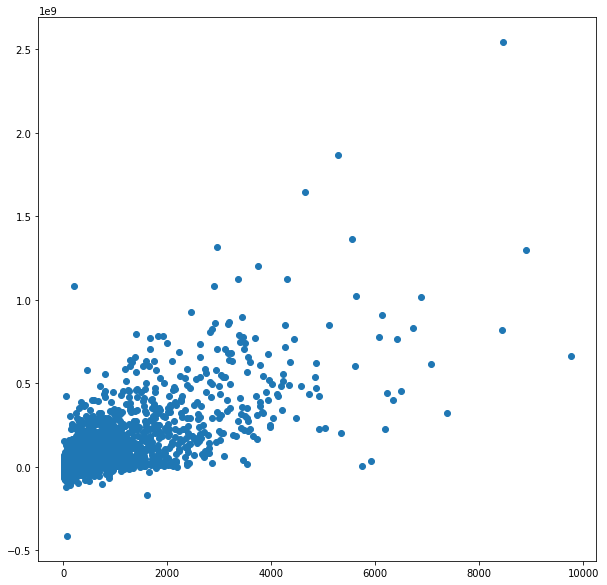

In [10]:
#converting vote_count from int to float
f_vote_count = df['vote_count'].astype(float)

plt.figure(figsize=(10, 10))
plt.scatter(f_vote_count, df['profit'])
plt.show()

<font size="4">We can say that the relationship between profit and vote_count is positive correlation</font>

### 3- does the movie with longer runtime, above the median of runtime, cost more than the movie with a shorter runtime?

In [11]:
# First, we will find median of runtime.
movie_median = df.runtime.median()

# create df contain movies with runtime longer than median, 106 minutes
df_long_runtime = df.query('runtime > {}'.format(movie_median))
# create df contain movies with runtime shorter than median, 106 minutes
df_short_runtime = df.query('runtime <= {}'.format(movie_median))


The budget mean of long runtime movies is 45954600.22119061


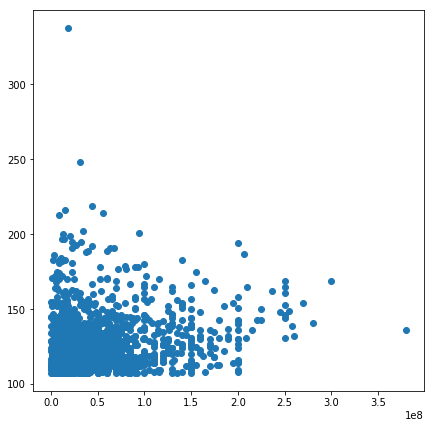

In [12]:
def movie_cost(dataframe):
    if dataframe.equals(df_long_runtime):
        strVar = "long"
    else:
        strVar = "short"
    print('The budget mean of {} runtime movies is {}'.format(strVar, dataframe.budget.mean()))
    
    plt.figure(figsize=(7, 7))
    plt.scatter(dataframe['budget'], dataframe['runtime'])
    plt.show()
    
movie_cost(df_long_runtime)

The budget mean of short runtime movies is 29295744.34174085


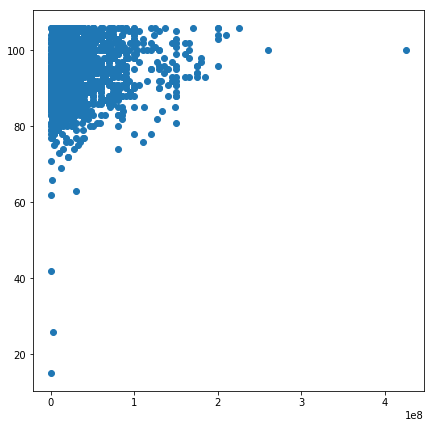

In [13]:
movie_cost(df_short_runtime)

<font size="4">By comparing the mean of both dataFrame, we can say it is cost more if the movie is long duration, but there is no correlation between budget and runtime.</font>

### 4- In 2015, which genres movies produced more, comedy or action?

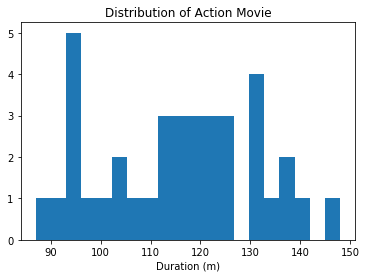

In 2015 there were 37 Action movies produced.


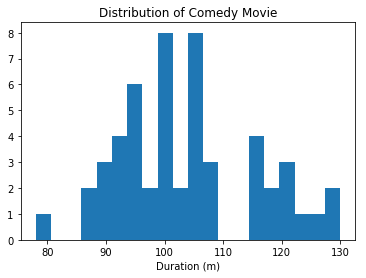

In 2015 there were 52 Comedy movies produced.


In [14]:
def genres_year(sGenres, sYear):
    """ This function will find number of movies depending on given parameter and print runtime histogram"""
    dfy = df.query('release_year == {}'.format(sYear))
    dfy = dfy[dfy['genres'].str.contains(sGenres)]
    
    plt.hist(dfy['runtime'], bins = 20)
    plt.title('Distribution of {} Movie'.format(sGenres))
    plt.xlabel('Duration (m)')        
    plt.show()
    
    print('In {} there were {} {} movies produced.'.format(sYear, dfy.shape[0], sGenres))

# Calling function
genres_year("Action", 2015)
genres_year("Comedy", 2015)

<a id='conclusions'></a>
## Conclusions

> This was interesting and satisfied analizing. When we explore the data, we saw that the relationship between profit and vote count is positive correlation. We are not sure if the these data are completely correct or not because while exploring data, there were weird value in some column like budget or revenue so this is a limitation.


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [15]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0